### # <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Tuesday, September 18 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Group members:

## Evan David, ead955


## Anuraag Mohile, arm5695

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 

One challenge that was personally encountered was the challenge of solving the wrong problem. This was encountered during a group project for school, in which the group was working on a dataset of homicides in the US, and trying to determine what could be learned from this data. The main goal of the project was to see if homicides could be predicted in the future, that way government resources could potentially be allocated accordingly in order to prevent these homicides. The dataset included data on the victims of the homicides, with demographics on the victims, location where the homicide occurred, when it occurred, as well as whether or not the case had been resolved or not. There was no information on the criminals in the dataset. The problem became that as the group explored the data, we realized that the questions we were asking had nothing to do with prediction at all, but simply exploratory analysis. This was after having spent a week or so on the project, so we decided to keep going with the analysis that we had. In the end we were able to get some good insights out of the analysis, and we even did some time series analysis of the future homicides for our predictions. However, it was clear that the dataset was meant to study the "response" variable of whether a case had been solved or not, and we did not do too much with this variable. If we were to go back and do it again, I think we would have spent more time on predicting the case resolutions based on the features of the data, as it would be a more interesting thing to find.

# Question 2: Maximum likelihood estimate (10 pts)

Prove the statement on slide 3 of notes on MLR:
"Then minimizing Mean Squared Error (MSE) on the training data (which you can do using OLS) yields the Maximum Likelihood Estimate (MLE) solution of the assumed generative model."

Consider,

$$Y=β_0 + β_1X + ε$$

Our likelihood function is given by,

$$L(Y_i,β_0,β_1,σ^2) = \frac{1}{(2π^{n/2}σ^n)}exp\bigg(\frac{-1}{(2σ^2)}\Big(\sum_{i=1}^n({Y_i−β_1X_i−β_0})^2\Big)\bigg)$$

For any fixed $σ > 0$, maximizing $L$ is equivalent to minimizing

$$E=\sum_{i=1}^n({Y_i−β_1X_i−β_0})^2$$

Here we show the mathematical proof:

<img src="image2 (2).jpeg">
<img src="image1 (3).jpeg">

# Question 3: Collinearity Issues (5 pts)

What is the “collinearity” issue encountered in MLR? Why is this a problem when you try to use MLR?
Suggest one way of addressing this problem.

Collinearity is a situation when several predictors are so highly correlated that we can't decide which one is important in explaining the association among the predictors and response. In MLR, it can increase the standard error significantly.

One way of addressing the problem is to leave for analysis only the predictors that are not highly correlated among each other using the knowledge of the process.

# Question 4: Multiple Linear Regression in Python (20 pts)

Use the following code to import the allstate-claims-severity dataset and linear models in python. The dataset is taken from https://www.kaggle.com/c/allstate-claims-severity I have removed the categorical variables to make it easier to run the models. Because of this, MAE (Mean absolute error) will be on higher end compared to other Kaggle entries. Please donwload the dataset "reduced_train.csv" and use it.



In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

train_df = pd.read_csv("reduced_train.csv")

X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

In [2]:
# print the shape of the feature matrix X
X.shape

(188318, 14)

In [3]:
# print the first five rows
X[:5]

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error, r2_score

# set up the linear regression model
regr = linear_model.LinearRegression()

# Train the model 
regr.fit(X, Y)

# get the predictions
Ypred = regr.predict(X)

# print the coefficients
print ('Coefficients: \n', regr.coef_)

# print the mean squared error
print ("Mean absolute error: %.2f" % mean_absolute_error(Y, Ypred))

Coefficients: 
 [-2137.11121171  1762.2406163    -56.57968487  -301.1729806
    30.03201819  -557.22509919  1707.95520608   298.61240614
  2049.37910438  -250.01986129 -1732.34887444  2724.38985824
  -631.30128902   273.62600504]
Mean absolute error: 1950.36


c.  (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. The code for this is given below. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error

# set up the regression
regr = linear_model.LinearRegression()

# Train the model using the training sets
model2 = regr.fit(X_train, Y_train)

# get the training and test predictions
Ypred2 = model2.predict(X_train)
Ypred3 = model2.predict(X_test)

# print the MAE for training and test
print ("Mean absolute error (train): %.2f" % mean_absolute_error(Y_train, Ypred2))
print ("Mean absolute error (test): %.2f" % mean_absolute_error(Y_test, Ypred3))

Mean absolute error (train): 1946.99
Mean absolute error (test): 1954.11


The MAE for the test data is higher than the MAE for the training data, and this is a good sign because it means we did not overfit the data, however it's still pretty close to the MAE from training data so we know the model is good.

d.  (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE. Explain the results.

(0, 25000)

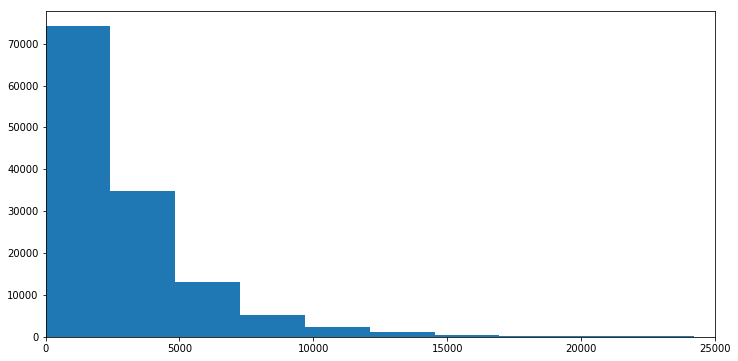

In [7]:
# plot the histogram of Y_train
plt.figure(figsize=(12,6))
plt.hist(Y_train, bins=50)
plt.xlim(xmin=0, xmax=25000)

(2, 12)

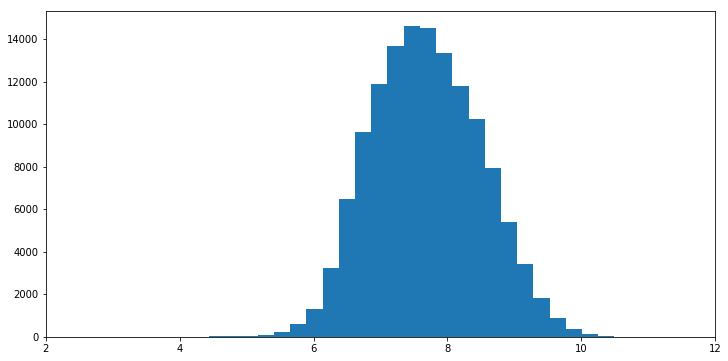

In [8]:
# take log of Y and plot histogram
plt.figure(figsize=(12,6))
logY = np.log(Y_train)
plt.hist(logY, bins=50)
plt.xlim(xmin=2, xmax=12)

In [9]:
# take log and fit model to training
logYtest = np.log(Y_test)
model3 = regr.fit(X_train, logY)

# get predictions of training and test
logYpred = model3.predict(X_train)
logYpred2 = model3.predict(X_test)

# print the MAE for training and test, bringing back to original scale
print ("Mean absolute error (train): %.2f" % mean_absolute_error(Y_train, np.exp(logYpred)))
print ("Mean absolute error (test): %.2f" % mean_absolute_error(Y_test, np.exp(logYpred2)))

Mean absolute error (train): 1797.44
Mean absolute error (test): 1810.65


These are lower than what we got for the normal training data, so taking the log improved the MAE in the end


# Question 5: Ridge and Lasso Regression (25 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. Take log of the Y_train and use it for training.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

# get the log of Y_train to use for training
logY = np.log(Y_train)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-6}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-6,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

In [11]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# set the parameters for the cross validation
alphas =  10**np.linspace(10,-6,100)*0.5
k_fold = KFold(5)
tuned_parameters = [{'alpha': alphas}]

# use MAE as the scoring metric
scoring = make_scorer(mean_absolute_error)

# run the lasso cross validation
lasso1 = linear_model.Lasso(random_state=50)
clf1 = GridSearchCV(lasso1, tuned_parameters, cv=k_fold, refit=False, scoring=scoring)
lasso_model = clf1.fit(X_train, logY)

scores_lasso = clf1.cv_results_['mean_test_score']

C:\Users\evand\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\evand\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\evand\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\evand\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_m

In [12]:
# get the best lambda value from cross validation for lasso
scores_lasso = pd.Series(scores_lasso)
best_lambda_lasso = alphas[scores_lasso[scores_lasso==min(scores_lasso)].index[0]]
print ("Best lambda (lasso): ")
best_lambda_lasso

Best lambda (lasso): 


6.309284415330092e-05

In [13]:
# run the ridge cross validation
ridge1 = linear_model.Ridge(random_state=50)
clf2 = GridSearchCV(ridge1, tuned_parameters, cv=k_fold, refit=False, scoring=scoring)
ridge_model = clf2.fit(X_train, logY)
scores_ridge = clf2.cv_results_['mean_test_score']

In [14]:
# get the best lambda value for ridge
scores_ridge = pd.Series(scores_ridge)
best_lambda_ridge = alphas[scores_ridge[scores_ridge==min(scores_ridge)].index[0]]
print ("Best lambda (ridge): ")
best_lambda_ridge

Best lambda (ridge): 


13.5929412136647

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

C:\Users\evand\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


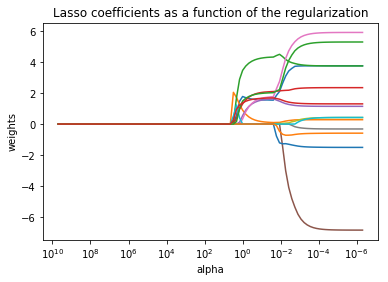

In [15]:
# get the coefficients for all alphas for lasso
coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, logY)
    coefs.append(lasso.coef_)
    
ax = plt.gca()

# plot this
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

We observe for Lasso that for high values of the regularization coefficient, all coeffecients are zero. As the regularization decreases, coeffecients start deviating from zero but a few still remain zero and thus their respective independent variables can be eliminated.

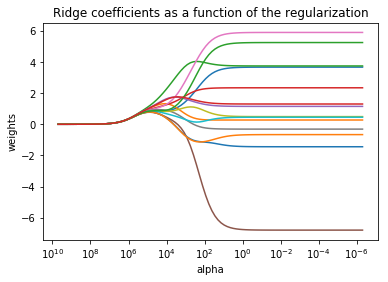

In [16]:
# get the coefficients for all alphas for ridge
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, logY)
    coefs.append(ridge.coef_)
    
ax = plt.gca()

# plot this
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

We observe for Ridge, the coeffecients start out very close to zero at high regularization but all become non-zero as regularization decreases (that is, putting less regularization penalty).

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

In [17]:
# set up least squares model
ols = linear_model.LinearRegression()
olsmodel = ols.fit(X_train, logY)

# get predictions on test data
olspred = olsmodel.predict(X_test)

# set up lasso model using best regularization parameter
lasso = Lasso(alpha=best_lambda_lasso, random_state=50)
lassofit = lasso.fit(X_train, logY)

# get predictions on test data
lassopred = lassofit.predict(X_test)

# set up ridge model using best regularization parameter
ridge = Ridge(alpha=best_lambda_ridge, random_state=50)
ridgefit = ridge.fit(X_train, logY)

# get predictions on test data
ridgepred = ridgefit.predict(X_test)

print ("Mean absolute error (ols): %.2f" % mean_absolute_error(Y_test, np.exp(olspred)))
print ("Mean absolute error (lasso): %.2f" % mean_absolute_error(Y_test, np.exp(lassopred)))
print ("Mean absolute error (ridge): %.2f" % mean_absolute_error(Y_test, np.exp(ridgepred)))

Mean absolute error (ols): 1810.65
Mean absolute error (lasso): 1810.64
Mean absolute error (ridge): 1810.63


4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

In [18]:
from sklearn.linear_model import LassoCV

# run lasso cross validation with specified parameters
lassocv = LassoCV(random_state=50, alphas=None, cv=10, max_iter=10000)
lassocv_model = lassocv.fit(X_train, logY)

# get the best lambda/alpha
bestalpha = lassocv_model.alpha_

print ("Best lambda: ")
bestalpha

Best lambda: 


1.742378003185893e-05

In [19]:
# run lasso again using best lambda/alpha
best_lasso = Lasso(alpha=bestalpha, random_state=50)
best_lasso_model = best_lasso.fit(X_train, logY)

# get the coefficients for all variables
print("Coefficients: ")
best_lasso_model.coef_

Coefficients: 


array([-0.51711206,  0.35693216,  0.01261526, -0.08068485, -0.00950437,
       -0.06881325,  0.30609698,  0.08840324,  0.57216477, -0.16869083,
       -0.35348216,  0.55420528, -0.09951851,  0.09436384])

# Question 6 (10pts)

Please solve problem \#3.3 on page 174 in Bishop (Chapter 3). The problem has been uploaded to Canvas under 'Files': **CH3 problems from Bishop PRML.pdf**.

We will show the solution of the error function using matrix notation.

\begin{align}
E_D(\mathbf{w})=\frac{1}{2}\sum_{n=1}^Nr_n(t_n-\mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_n))^2 \\
=\frac{1}{2}(\boldsymbol{\Phi}\mathbf{w}-\mathbf{t})^T\mathbf{R}(\boldsymbol{\Phi}\mathbf{w}-\mathbf{t}) \\
=\frac{1}{2}(\mathbf{w}^T\boldsymbol{\Phi}^T\mathbf{R}\boldsymbol{\Phi}\mathbf{w}-\mathbf{w}^T\boldsymbol{\Phi}^T\mathbf{R}\mathbf{t}-\mathbf{t}^T\mathbf{R}\boldsymbol{\Phi}\mathbf{w}+\mathbf{t}^T\mathbf{R}\mathbf{t}) \\
=\frac{1}{2}(\mathbf{w}^T\boldsymbol{\Phi}^T\mathbf{R}\boldsymbol{\Phi}\mathbf{w}-2\mathbf{t}^T\mathbf{R}\boldsymbol{\Phi}\mathbf{w}+\mathbf{t}^T\mathbf{R}\mathbf{t})
\end{align}
Since $\mathbf{R}=diag(r_1,...,r_n)$

Taking the gradient of the error function:

\begin{align}
\nabla E_D(\mathbf{w}) = \boldsymbol{\Phi}^T\mathbf{R}\boldsymbol{\Phi}\mathbf{w}-\mathbf{t}^T\mathbf{R}\boldsymbol{\Phi} \\
\mathbf{w}^* = (\boldsymbol{\Phi}^T\mathbf{R}\boldsymbol{\Phi})^{-1}\mathbf{t}^T\mathbf{R}\boldsymbol{\Phi} \\
= (\boldsymbol{\Phi}^T\mathbf{R}\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^T\mathbf{R}\mathbf{t}
\end{align}

$r_n$ can be thought of as a variance parameter dependent on the data point $(x_n, t_n)$ that either replaces or scales $\beta$. Alternatively, $r_n$ can be thought of as an effective number of replicated observations of the data point $(x_n, t_n)$, especially considering $r_n$ taking positive integer values, but it is valid for any $r_n>0$.